In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.5 MB/s eta 0:00:00


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools

In [3]:
#Define the number of locations and vehicles

num_locations = 15 # Define the number of locations (eg 10)

locations =[((random.randint(0,50)),(random.randint(0,50))) for i in range(num_locations)] # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot =(9,10) # Define the coordinates for the depot

num_vehicles = 3# Define the number of vehicles

In [4]:
print(locations)

[(14, 10), (50, 39), (46, 5), (33, 5), (27, 45), (47, 32), (39, 48), (19, 9), (35, 38), (1, 44), (33, 46), (41, 21), (15, 36), (32, 21), (23, 32)]


In [5]:
# Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [6]:
#Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [7]:

def calculate_distance(l1,l2):
  return((((l1[0]-l2[0])**2)+(l1[1]-l2[1])**2)**0.5)

def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = 0
        current_location = depot
        for location in vehicle_route[1:]:
            vehicle_distance += calculate_distance(current_location, location)
            current_location = location


        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)


    #- Write the fitness evaluation function
    #              - Return (total distance, standard deviation)



# Register the evaluate function in the toolbox

In [8]:
# Configure the genetic operators

toolbox.register("mate",tools.cxPartialyMatched) # Choose and configure a crossover method
toolbox.register("mutate",tools.mutShuffleIndexes, indpb=0.1) # Choose and configure a mutation method
toolbox.register("select",tools.selTournament, tournsize=3) # Choose and configure a selection method

In [9]:

def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

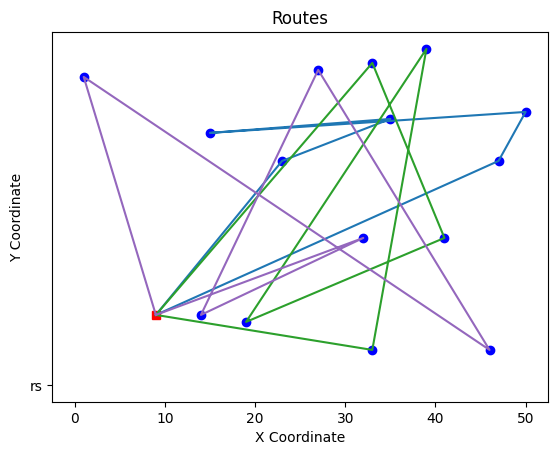

In [10]:
plot_routes(toolbox.individual())

gen	nevals	avg    	min    
0  	300   	271.519	1.07177
1  	239   	259.646	1.91888
2  	236   	251.664	3.14015
3  	225   	248.316	2.02621
4  	230   	245.207	0.758764
5  	241   	242.278	1.20995 
6  	217   	236.418	1.20995 
7  	230   	236.88 	0.992749
8  	228   	237.219	1.15737 
9  	223   	234.169	2.49994 
10 	217   	234.604	1.2148  
11 	233   	232.764	2.11807 
12 	221   	231.17 	0.888009
13 	219   	229.241	0.888009
14 	227   	230.255	0.387093
15 	231   	230.478	1.71578 
16 	224   	228.459	0.596551
17 	214   	223.459	1.00951 
18 	222   	217.896	1.81945 
19 	223   	216.205	2.645   
20 	251   	212.162	1.36542 
21 	230   	207.826	3.51808 
22 	235   	205.03 	1.70614 
23 	226   	198.547	1.29768 
24 	220   	193.73 	1.75613 
25 	231   	190.029	4.30141 
26 	232   	182.845	4.22696 
27 	231   	182.11 	0.661514
28 	240   	180.544	1.98983 
29 	238   	177.917	3.86647 
30 	226   	177.831	0.887017
31 	234   	176.898	2.84364 
32 	221   	173.6  	4.50311 
33 	228   	176.192	1.02424 
34 	225   	173.364	1.0242

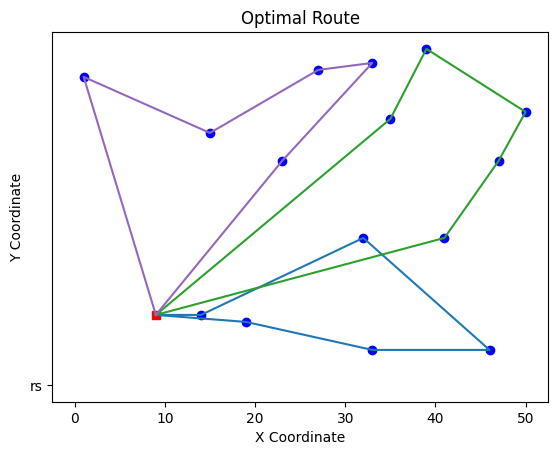

In [11]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
from deap  import algorithms
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
    #print the results